#### 과제0808
검색 키워드와 총 필요한 뉴스기사 수를 입력하면 요청한 만큼 데이터프레임 형태(컬럼은 title, url)로 출력해주는 크롤링 프로그램을 수행하세요.

In [10]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [30]:
!pip install wordcloud

In [1]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query='

In [2]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
news_df = pd.DataFrame(columns=['title','url'])
def search(keyword, num):
    title_list = []
    url_list = []
    news_df = pd.DataFrame(columns=['title','url'])
    for i in range(1, num+1, 10):
        url = 'https://search.naver.com/search.naver?where=news&query='+str(keyword)+'&start='+str(i)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'lxml')
        articles = soup.find_all('a',{'class':{'news_tit'}})
        for article in articles:
            newslink = article['href']
            url_list.append(newslink)
            title = article.text
            title_list.append(title)
    news_df.title = title_list
    news_df.url = url_list
    return news_df.iloc[:num].drop_duplicates(subset=['title', 'url'])



In [3]:
df = search('AI', 100)
df

,title,url
0,"KT·서울성모병원, 당뇨 관리 돕는 AI 기술 개발",https://biz.chosun.com/it-science/ict/2022/08/...
1,"김영환 지사, 과기장관에 AI영재고 설립 지원 등 건의",https://www.yna.co.kr/view/AKR2022080810650006...
2,"삼성전자, AI인재 키워 반도체·디스플레이 연구한다",https://zdnet.co.kr/view/?no=20220807083406
3,삼성전자 ‘AI 챌린지’,https://www.chosun.com/economy/tech_it/2022/08...
4,'2022 스마트농업 AI 경진대회' 개최,http://www.aflnews.co.kr/news/articleView.html...
...,...,...
95,"금융위, 금융분야 AI기술 활성화 나선다",http://www.fnnews.com/news/202208040835276440
96,포스코 AI기술 자문위원회…산학전문가 20여명 첫 회의,http://news.mk.co.kr/newsRead.php?no=690700&ye...
97,"마우저, 협업을 통한 혁신...'AI 기반 차세대 운전자 모니터링 시스템' 조명",http://www.aitimes.kr/news/articleView.html?id...
98,"[데일리 IT 단신] KT-NIPA, ICT 벤처 DX컨설팅·AI인재양성 지원 外",https://biz.newdaily.co.kr/site/data/html/2022...


In [ ]:
# html = rq.get(url, headers=headers).text
#     bs = BeautifulSoup(html, 'lxml')
#     result_p += ' '.join(re.findall('[가-힣]+', str(bs.find_all('p'))))

# result_p


In [21]:
keyword = input('검색어를 입력해주세요.') 
num = int(input('게시물 수를 입력해주세요.'))
title_list = []
url_list = []
result = ''
news_df = pd.DataFrame(columns=['title','url'])
for i in range(1, num+1, 10):
    url = 'https://search.naver.com/search.naver?where=news&query='+str(keyword)+'&start='+str(i)
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')
    articles = soup.select('#sp_nws1 > div.news_wrap.api_ani_send > div > div.news_info > div.info_group > a:nth-child(3)')
    for article in articles:
        newslink = article['href']
        url_list.append(newslink)
        title = article.text
        title_list.append(title)
    for body in url_list:
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        response = requests.get(body, headers=headers)
        soup = BeautifulSoup(response.text, 'lxml')
        result += ' '.join(re.findall('[가-힣]+', str(soup.select('#dic_area'))))
        
news_df.title = title_list
news_df.url = url_list
print(result)

검색어를 입력해주세요.AI
게시물 수를 입력해주세요.500
청주 연합뉴스 박재천 기자 김영환 충북지사는 일 세종에서 이종호 과학기술정보통신부 장관을 만나 지역 주요 현안에 대한 관심과 지원을 요청했다 김 지사는 충북의 성장 발판이 될 사업이라며 한국과학기술원 오송 바이오메디컬 캠퍼스타운 조성 인공지능 영재고 설립 오창 방사광가속기 적기 구축 및 최첨단 연구인프라 구축 충청권 공동 인공지능 메타버스 기반 재난안전관리 등에 대한 전폭적인 지원을 건의했다 이종호 왼쪽 장관과 김영환 지사 충북도 제공 재판매 및 금지 김 지사는 대한민국 바이오 발전을 견인하는 충북이 한 단계 더 발전하기 위해 의과학 교육시설인 카이스트 캠퍼스타운 조성이 필요하고 현 정부의 반도체 인력양성 기조에 부합하는 카이스트 부설 영재고도 필수 불가결한 사업 이라고 강조했다 이 장관은 충북은 바이오 반도체 이차전지 산업의 중심으로 대한민국 첨단산업의 미래를 견인하고 있다고 생각하며 충북 발전을 위해 건의 사업에 대해 긍정적으로 검토하겠다 고 말했다청주 연합뉴스 박재천 기자 김영환 충북지사는 일 세종에서 이종호 과학기술정보통신부 장관을 만나 지역 주요 현안에 대한 관심과 지원을 요청했다 김 지사는 충북의 성장 발판이 될 사업이라며 한국과학기술원 오송 바이오메디컬 캠퍼스타운 조성 인공지능 영재고 설립 오창 방사광가속기 적기 구축 및 최첨단 연구인프라 구축 충청권 공동 인공지능 메타버스 기반 재난안전관리 등에 대한 전폭적인 지원을 건의했다 이종호 왼쪽 장관과 김영환 지사 충북도 제공 재판매 및 금지 김 지사는 대한민국 바이오 발전을 견인하는 충북이 한 단계 더 발전하기 위해 의과학 교육시설인 카이스트 캠퍼스타운 조성이 필요하고 현 정부의 반도체 인력양성 기조에 부합하는 카이스트 부설 영재고도 필수 불가결한 사업 이라고 강조했다 이 장관은 충북은 바이오 반도체 이차전지 산업의 중심으로 대한민국 첨단산업의 미래를 견인하고 있다고 생각하며 충북 발전을 위해 건의 사업에 대해 긍정적으로 검토하겠다 고 말했다새

In [22]:
# import re
# text = re.sub('[^가-힣]+', ' ',str(title_list) )
# print(len(text))
# text
len(result)

669829

In [23]:
with open('notuse.txt','rt',encoding='UTF8') as f:
    rl = f.readlines()

file = re.sub('[^가-힣]',' ', str(rl))
file = re.sub('\s+',' ', file)
file

' 홈페이지 과학 이나 건의 성장 단계 대신 구독 시민 군호 연구소장 영등포구 반면 고민 사격 전세 동향 나노 생산 차질 추격 노사 창사 임금 촉각 경기 이전 세상 모바일 활성화 또한 인수 주최 중학교 격차 기존 전투 여단 주제 유기 포함 방식 구성 조성 최영석 한정호 실장 전현정 김필수 대출 소비자 입자 구합 설마 김주현 신성 자립 혜주 여명 단체 메시 버넥트 하태진 크리에이티브 콘테스트 팩토리 리딩 여의 장치 씨게이트 유니온 커뮤니티 런던 유럽 큐어 링크 정보보호 주름 플립 하나은행 다누리 교신 배트 크랭크 직전 폐기 수도권 거점 오피스 인더스 트리 인사이트 인텔리전트 하이퍼 오토메이션 생방송 코리아 그랜드 서밋 컨택 컨퍼런스 개선 의견 은행 위원 효과 대학생 포럼 연합뉴스 필수 행사 서울시 특집 판결 서머 랠리 닥치 조각 한자리 빙상 연맹 정재웅 정재원 헤드라인 임명 여의도 국교 안전원 기자회견 당직 반발 국위 격랑 폐단 벌써 민생 내일 중부 남부 국유 토지 매각 집회 불허 위헌 부정 육박 여론조사 남녀 지지도 전주 주간 직무 박지원 민심 빈손 복귀 박용진 악수 잡고 각료 교체 쇄신 경찰 방장 불법 난타 물가 노동부 연방 동월 단행 다우존스 서해 서도 실탄 고래 싸움 새우등 시험대 그간 권법 본격 용산 대통령실 토큰 자본시장 규율 일관 확립 타당성 정당성 바이든 행정명령 호조 빅스 코스피 연말 소녀시대 에스엠 질환 헬스 데이 보스 택시 보험 사기 연상 여사 표절 피해자 폭우 북부 연천 필승 시내 응급실 한라 종합병원 내시경 당초 항공권 부상 통계청 캄보디아 자랑 방역 어가 예술인 예술 문화재단 조직 보령 유혹 먹거리 서경덕 형님 조상 정복 나이 도사 통운 되뇌었다 년생 족적 노스캐롤라이나주 그린즈버러 세지 필드 컨트리클럽 시즌 정규 라운드 이글 버디 합계 더파 임성재 재미교포 스피드스케이팅 죄송 출석 최연 정상 등장 연장 준우승 전인 그랜드슬램 도전 임영웅 왕전 백혈병 기부 수첩 잔류 농약 정쟁 도구 수신료 존폐 언제 피플 이정재 관상 전성 인생 재패니즈

In [24]:
from konlpy.tag import Okt
import pandas as pd
okt = Okt()

stop_words = file

word_token = okt.morphs(result)

s = [word for word in word_token if not word in stop_words]
s

['재천',
 '정보통신부',
 '장관',
 '만나',
 '주요',
 '관심',
 '했다',
 '이라',
 '바이오',
 '메디',
 '컬',
 '지능',
 '영재',
 '지능',
 '메타',
 '버스',
 '했다',
 '장관',
 '제공',
 '바이오',
 '발전',
 '발전',
 '시설',
 '카이스트',
 '필요하고',
 '정부',
 '반도체',
 '카이스트',
 '영재',
 '불가결한',
 '이라고',
 '했다',
 '장관',
 '바이오',
 '반도체',
 '중심',
 '미래',
 '있다고',
 '하며',
 '발전',
 '긍정',
 '하겠다',
 '했다',
 '재천',
 '정보통신부',
 '장관',
 '만나',
 '주요',
 '관심',
 '했다',
 '이라',
 '바이오',
 '메디',
 '컬',
 '지능',
 '영재',
 '지능',
 '메타',
 '버스',
 '했다',
 '장관',
 '제공',
 '바이오',
 '발전',
 '발전',
 '시설',
 '카이스트',
 '필요하고',
 '정부',
 '반도체',
 '카이스트',
 '영재',
 '불가결한',
 '이라고',
 '했다',
 '장관',
 '바이오',
 '반도체',
 '중심',
 '미래',
 '있다고',
 '하며',
 '발전',
 '긍정',
 '하겠다',
 '했다',
 '통신망',
 '플랫폼',
 '서비스업',
 '온다',
 '호텔',
 '업무',
 '호텔',
 '유수',
 '힘쓸',
 '걷고',
 '공급',
 '사업자',
 '플랫폼',
 '이라는',
 '만든다',
 '지능',
 '출시',
 '기자간담회',
 '필요한',
 '고객',
 '전달',
 '사후',
 '케어',
 '해주는',
 '플랫폼',
 '이라',
 '밝혔다',
 '사업자',
 '강점',
 '하겠다는',
 '따르면',
 '앱',
 '확인',
 '이상호',
 '단장',
 '다양한',
 '업계',
 '해결',
 '있도록',
 '솔루션',
 '내놓을',
 '계획',
 '이라고',
 '밝혔다',
 '현대',
 '손잡고',
 '내놓은',
 '지난해'

In [25]:
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(str(s))
noun_list = []
for word, tag in morph:
    if (tag=='Noun')& (len(word)>1):
        noun_list.append(word)
# print(morph)
print(noun_list)

['재천', '정보통신부', '장관', '주요', '관심', '바이오', '지능', '영재', '지능', '메타', '버스', '장관', '제공', '바이오', '발전', '발전', '시설', '카이스트', '정부', '반도체', '카이스트', '영재', '장관', '바이오', '반도체', '중심', '미래', '발전', '긍정', '재천', '정보통신부', '장관', '주요', '관심', '바이오', '지능', '영재', '지능', '메타', '버스', '장관', '제공', '바이오', '발전', '발전', '시설', '카이스트', '정부', '반도체', '카이스트', '영재', '장관', '바이오', '반도체', '중심', '미래', '발전', '긍정', '통신망', '플랫폼', '서비스업', '호텔', '업무', '호텔', '유수', '공급', '사업자', '플랫폼', '지능', '출시', '기자간담회', '고객', '전달', '사후', '케어', '플랫폼', '사업자', '강점', '확인', '이상호', '단장', '업계', '해결', '솔루션', '계획', '현대', '지난해', '지난해', '호텔', '호텔', '음식점', '호텔', '융합기술원', '기능', '수원시', '협약', '케어', '독거', '노인', '가구', '혼자', '음성인식', '시스템', '독거', '노인', '말동무', '단위', '문제', '생기', '보호자', '업계', '협력', '분석', '중공업', '자회사', '로보틱스', '업무', '협약', '양해각서', '체결', '협력', '내용', '이후', '현대', '로보틱스', '로보틱스', '업계', '관계자', '로보틱스', '제조', '수위', '라며', '로보틱스', '적극', '서초구', '융합기술원', '지코', '스터디', '융합기술원', '상무', '차별', '방향', '공감', '테크', '업계', '유성구', '본관', '현모', '이광', '업무', '협약', '지난해', '전산', '전자공학',

In [26]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font', family = 'Malgun Gothic') #한글 폰트 설정
count = Counter(noun_list)
data = dict(count.most_common())
print(data)

{'지능': 1679, '가상': 1426, '면접': 889, '분야': 753, '채용': 693, '도입': 485, '업무': 454, '펄스나인': 414, '제공': 374, '제인': 368, '분석': 367, '사회': 358, '업계': 348, '지난해': 347, '제네시스': 322, '내용': 317, '투자': 306, '서비스업': 294, '융합기술원': 294, '전략': 287, '로보틱스': 282, '반도체': 277, '미래': 277, '관련': 277, '얼굴': 276, '솔루션': 275, '추진': 270, '간담': 266, '계획': 265, '정책': 263, '이번': 252, '포스코': 247, '호텔': 245, '고객': 245, '관계자': 239, '라며': 233, '크게': 231, '혁신': 230, '라이브': 230, '발전': 227, '적용': 225, '보안': 224, '금융위': 224, '바이오': 207, '중심': 202, '카카오': 201, '문제': 194, '부문': 194, '장점': 191, '확대': 190, '명화': 186, '모네': 186, '작품': 186, '음성': 184, '버추': 184, '휴먼': 184, '핵심': 183, '시스템': 182, '경력': 181, '협약': 180, '노인': 178, '현재': 170, '비대': 169, '영상': 169, '결과': 169, '효율': 167, '주요': 164, '표정': 162, '인재': 162, '라이브러리': 160, '김소영': 160, '어르신': 160, '우려': 158, '방향': 155, '표현': 155, '모방': 155, '위원장': 155, '대체': 154, '행동': 152, '일부': 151, '장관': 150, '정부': 150, '영재': 148, '플랫폼': 147, '현대': 147, '지코': 147, '스터디': 147, '문장': 147, 

In [28]:
# for key, value in data.items():
#     if value > 125:
#         del data[key]

(-0.5, 7999.5, 3999.5, -0.5)

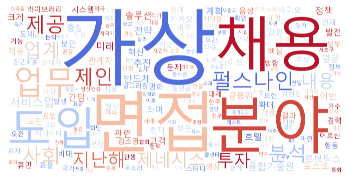

In [31]:
#워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='./malgun.ttf', 
                      background_color = 'white',
                      colormap = 'coolwarm', 
                      width=8000, height=4000,
                      prefer_horizontal = True).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')